In [1088]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [1089]:
X = pd.read_csv("RedditShortDemoSurvey-1-Cleaned.csv")

In [1090]:
X

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


In [1091]:
y = X.pop('Unnamed: 14')

In [1092]:
y = X.pop('Unnamed: 15')

In [1093]:
y = X.pop('Unnamed: 16')

In [1094]:
y = X.pop('Unnamed: 17')

In [1095]:
y = X.pop('Unnamed: 18')

In [1096]:
y = X.pop('Unnamed: 19')

In [1097]:
# shortening the column names as they are too big
X.columns = ['Member_ID','Sex', 'Age_Category','Marital_Status','Emp_Status','Military','Childrenlt18','Education_level',
             'Country','State','Income_range','SubReddit_data','DogorCat','Choice_Cheese']

In [1098]:
X

,Member_ID,Sex,Age_Category,Marital_Status,Emp_Status,Military,Childrenlt18,Education_level,Country,State,Income_range,SubReddit_data,DogorCat,Choice_Cheese
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster


In [1099]:
X.shape

(32754, 14)

In [1100]:
X.Country.value_counts()

United States                       20967
Canada                               2888
United Kingdom                       1782
Australia                            1051
Germany                               407
New Zealand                           315
Sweden                                309
Norway                                288
Ireland                               242
Finland                               188
Denmark                               182
none                                  177
India                                 154
France                                142
The Netherlands                       141
Netherlands                           134
Belgium                               119
Poland                                112
Brazil                                111
Mexico                                108
Spain                                 100
canada                                 97
Portugal                               87
Switzerland                       

## 1.Aggregating Country to Continents

In [1101]:
Continent = {
    'United States':'North America','Canada':'North America','Mexico':'North America','United Kingdom':'Europe',
    'Australia':'Australia','New Zealand':'Australia','Sweden':'Europe','Germany':'Europe','France':'Europe',
    'Romania':'Europe','Norway':'Europe','Finland':'Europe','Ireland':'Europe','Denmark':'Europe','India':'Asia',
    'Netherlands':'Europe','The Netherlands':'Europe','Belgiun':'Europe','Poland':'Europe','Brazil':'South America',
    'Spain':'Europe','canada':'North America','Portugal':'Europe','Switzerland':'Europe','Singapore':'Asia',
    'South Africa':'Africa','England':'Europe','Italy':'Europe','Japan':'Asia','Toronto':'North America',
    'Nigeria':'Africa','Hong':'Asia'
}

In [1102]:
X['Continent']=X['Country'].map(Continent)

In [1103]:
X

,Member_ID,Sex,Age_Category,Marital_Status,Emp_Status,Military,Childrenlt18,Education_level,Country,State,Income_range,SubReddit_data,DogorCat,Choice_Cheese,Continent
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,North America
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,North America
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,North America
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,North America
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,North America
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,North America
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,Europe
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,North America
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,North America
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,Europe


## 2.Drop US states

In [1104]:
X = X.drop(['State'], axis=1)

## 3.Handling Missing values

In [1105]:
# Data cleaning of Sex
X.Sex.value_counts()

Male      26418
Female     6135
None        201
Name: Sex, dtype: int64

## As we see there are 201 missing values mentioned as None

In [1106]:
# We try to handle it with other variables 
X[X.Sex=="None"]['Marital_Status'].value_counts()

Forever Alone                               78
In a relationship                           46
Single                                      45
Married/civil union/domestic partnership    27
Engaged                                      5
Name: Marital_Status, dtype: int64

In [1107]:
X[X.Marital_Status=='Forever Alone']['Sex'].value_counts()

Male      5086
Female     686
None        78
Name: Sex, dtype: int64

In [1108]:
X[X.Marital_Status=='In a relationship']['Sex'].value_counts()

Male      7363
Female    2419
None        46
Name: Sex, dtype: int64

In [1109]:
X[X.Marital_Status=='Single']['Sex'].value_counts()

Male      8672
Female    1711
None        45
Name: Sex, dtype: int64

In [1110]:
X[X.Marital_Status=='Married/civil union/domestic partnership']['Sex'].value_counts()

Male      4441
Female    1022
None        27
Name: Sex, dtype: int64

In [1111]:
X[X.Marital_Status=='Engaged']['Sex'].value_counts()

Male      826
Female    278
None        5
Name: Sex, dtype: int64

In [1112]:
def setMale(m):
    if m == "None":
        return "Male"
    else:
        return m
X['Sex'] = X['Sex'].map(setMale)

In [1113]:
X.Sex.value_counts()

Male      26619
Female     6135
Name: Sex, dtype: int64

## Data Cleaning of Age

In [1114]:
X.Age_Category.value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: Age_Category, dtype: int64

# There are 88 missing values in Category of Age

In [1115]:
X[X.Age_Category=="None"]['Marital_Status'].value_counts()

Forever Alone                               56
Single                                      18
In a relationship                            8
Engaged                                      3
Married/civil union/domestic partnership     3
Name: Marital_Status, dtype: int64

In [1116]:
X[X.Marital_Status=="Forever Alone"]['Age_Category'].value_counts()

18-24          3153
25-34          1527
Under 18        797
35-44           236
45-54            57
None             56
55-64            12
65 or Above      12
Name: Age_Category, dtype: int64

In [1117]:
X[X.Marital_Status=="Single"]['Age_Category'].value_counts()

18-24          6313
25-34          2558
Under 18       1062
35-44           357
45-54            78
55-64            26
None             18
65 or Above      16
Name: Age_Category, dtype: int64

In [1118]:
X[X.Marital_Status=="In a relationship"]['Age_Category'].value_counts()

18-24          5545
25-34          3504
Under 18        455
35-44           248
45-54            54
None              8
55-64             7
65 or Above       7
Name: Age_Category, dtype: int64

In [1119]:
X[X.Marital_Status=="Engaged"]['Age_Category'].value_counts()

25-34          674
18-24          351
35-44           68
Under 18         6
45-54            4
None             3
65 or Above      2
55-64            1
Name: Age_Category, dtype: int64

In [1120]:
X[X.Marital_Status=="Married/civil union/domestic partnership"]['Age_Category'].value_counts()

25-34          3296
35-44          1344
18-24           431
45-54           306
55-64            88
65 or Above      16
Under 18          6
None              3
Name: Age_Category, dtype: int64

In [1121]:
def setAgeCat(a):
    if a == "None":
        return "18-24"
    else:
        return a
X['Age_Category'] = X['Age_Category'].map(setAgeCat)

In [1122]:
X.Age_Category.value_counts()

18-24          15890
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
65 or Above       60
Name: Age_Category, dtype: int64

## Cleaning Data of Marital Status

In [1123]:
X.Marital_Status.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: Marital_Status, dtype: int64

In [1124]:
# As majority are singles we directly assign the blank to Single as there are very few
def setMarStat(ms):
    if ms == "Blank":
        return "Single"
    else:
        return ms
X['Marital_Status'] = X['Marital_Status'].map(setMarStat)

In [1125]:
X.Marital_Status.value_counts()

Single                                      10433
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Name: Marital_Status, dtype: int64

# Data Cleaning of status of an Employee

In [1126]:
X.Emp_Status.value_counts()

Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: Emp_Status, dtype: int64

In [1127]:
X[X.Emp_Status=="None"]['Age_Category'].value_counts()

18-24       87
25-34       42
Under 18     9
35-44        8
45-54        4
55-64        1
Name: Age_Category, dtype: int64

In [1128]:
X[X.Age_Category=='18-24']['Emp_Status'].value_counts()

Student                                  9456
Employed full time                       4324
Not employed, but looking for work       1145
Freelance                                 650
Not employed and not looking for work     224
None                                       87
Retired                                     4
Name: Emp_Status, dtype: int64

In [1129]:
# Majority are Students so set none to Student
def setEmpStat(E):
    if E == "None":
        return "Student"
    else:
        return E
X['Emp_Status'] = X['Emp_Status'].map(setEmpStat)

In [1130]:
X.Emp_Status.value_counts()

Employed full time                       14814
Student                                  13138
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
Retired                                     85
Name: Emp_Status, dtype: int64

## Data Cleaning of Military Service

In [1131]:
X.Military.value_counts()

No      30526
Yes      2223
none        5
Name: Military, dtype: int64

In [1132]:
# Since there are just 5 none values set it to No.
def setMilitary(x):
    if x == "none":
        return "No"
    else:
        return x
X['Military'] = X['Military'].map(setMilitary)

In [1133]:
X.Military.value_counts()

No     30531
Yes     2223
Name: Military, dtype: int64

## Having Children under age 18 

In [1134]:
X.Childrenlt18.value_counts()

No      27488
Yes      5047
None      219
Name: Childrenlt18, dtype: int64

In [1135]:
X[X.Childrenlt18=="None"]['Marital_Status'].value_counts()

Forever Alone                               76
Single                                      56
In a relationship                           54
Married/civil union/domestic partnership    27
Engaged                                      5
Widowed                                      1
Name: Marital_Status, dtype: int64

In [1136]:
X[X.Marital_Status=="Forever Alone"]['Childrenlt18'].value_counts()

No      5055
Yes      719
None      76
Name: Childrenlt18, dtype: int64

In [1137]:
X[X.Marital_Status=="Single"]['Childrenlt18'].value_counts()

No      9320
Yes     1057
None      56
Name: Childrenlt18, dtype: int64

In [1138]:
X[X.Marital_Status=="In a relationship"]['Childrenlt18'].value_counts()

No      9019
Yes      755
None      54
Name: Childrenlt18, dtype: int64

In [1139]:
X[X.Marital_Status=="Married/civil union/domestic partnership"]['Childrenlt18'].value_counts()

No      3067
Yes     2396
None      27
Name: Childrenlt18, dtype: int64

In [1140]:
X[X.Marital_Status=="Engaged"]['Childrenlt18'].value_counts()

No      996
Yes     108
None      5
Name: Childrenlt18, dtype: int64

In [1141]:
X[X.Marital_Status=="Widowed"]['Childrenlt18'].value_counts()

No      31
Yes     12
None     1
Name: Childrenlt18, dtype: int64

In [1142]:
# Majority has no so we set it to no
def setChdlt18(x):
    if x == "None":
        return "No"
    else:
        return x
X['Childrenlt18'] = X['Childrenlt18'].map(setChdlt18)

In [1143]:
X.Childrenlt18.value_counts()

No     27707
Yes     5047
Name: Childrenlt18, dtype: int64

## Data cleaning of Education

In [1144]:
X.Education_level.value_counts()

Bachelor's degree                     11046
Some college                           9600
Graduate or professional degree        4722
High school graduate or equivalent     3272
Some high school                       1924
Associate degree                       1411
Trade or Vocational degree              635
None                                    144
Name: Education_level, dtype: int64

In [1145]:
X[X.Education_level=="None"]['Marital_Status'].value_counts()

Forever Alone                               68
Single                                      38
In a relationship                           24
Married/civil union/domestic partnership    13
Engaged                                      1
Name: Marital_Status, dtype: int64

In [1146]:
X[X.Marital_Status=="Forever Alone"]['Education_level'].value_counts()

Some college                          1811
Bachelor's degree                     1493
High school graduate or equivalent     871
Some high school                       673
Graduate or professional degree        590
Associate degree                       221
Trade or Vocational degree             123
None                                    68
Name: Education_level, dtype: int64

In [1147]:
X[X.Marital_Status=="Single"]['Education_level'].value_counts()

Some college                          3484
Bachelor's degree                     3215
High school graduate or equivalent    1261
Graduate or professional degree       1080
Some high school                       822
Associate degree                       376
Trade or Vocational degree             157
None                                    38
Name: Education_level, dtype: int64

In [1148]:
X[X.Marital_Status=="In a relationship"]['Education_level'].value_counts()

Bachelor's degree                     3624
Some college                          3004
Graduate or professional degree       1408
High school graduate or equivalent     852
Associate degree                       397
Some high school                       352
Trade or Vocational degree             167
None                                    24
Name: Education_level, dtype: int64

In [1149]:
X[X.Marital_Status=="Married/civil union/domestic partnership"]['Education_level'].value_counts()

Bachelor's degree                     2240
Graduate or professional degree       1404
Some college                          1038
Associate degree                       342
High school graduate or equivalent     235
Trade or Vocational degree             162
Some high school                        56
None                                    13
Name: Education_level, dtype: int64

In [1150]:
X[X.Marital_Status=="Engaged"]['Education_level'].value_counts()

Bachelor's degree                     457
Some college                          255
Graduate or professional degree       230
Associate degree                       72
High school graduate or equivalent     52
Trade or Vocational degree             23
Some high school                       19
None                                    1
Name: Education_level, dtype: int64

In [1151]:
# As majority is either of bachelors and Some college we divide it in  a ratio of 50:50
global edu_flip_sw
def setEdu(x):
    global edu_flip_sw
    if x == "None":
        edu_flip_sw *= -1
        if edu_flip_sw == 1:
            return "Bachelor's degree"
        else:
            return "Some college"
    else:
        return x
edu_flip_sw = 1
X['Education_level'] = X['Education_level'].map(setEdu)

In [1152]:
X.Education_level.value_counts()

Bachelor's degree                     11118
Some college                           9672
Graduate or professional degree        4722
High school graduate or equivalent     3272
Some high school                       1924
Associate degree                       1411
Trade or Vocational degree              635
Name: Education_level, dtype: int64

# Country and Continent(Aggregated feature)

In [1153]:
X.Country.value_counts()

United States                       20967
Canada                               2888
United Kingdom                       1782
Australia                            1051
Germany                               407
New Zealand                           315
Sweden                                309
Norway                                288
Ireland                               242
Finland                               188
Denmark                               182
none                                  177
India                                 154
France                                142
The Netherlands                       141
Netherlands                           134
Belgium                               119
Poland                                112
Brazil                                111
Mexico                                108
Spain                                 100
canada                                 97
Portugal                               87
Switzerland                       

In [1154]:
X.Continent = X.Continent.fillna(value = "North America")

In [1155]:
X.Continent.value_counts()

North America    26496
Europe            4398
Australia         1366
Asia               302
South America      111
Africa              81
Name: Continent, dtype: int64

## Data Cleaning of Income

In [1156]:
X.Income_range.value_counts()

Under $20,000          7892
$50,000 - $69,999      4133
$70,000 - $99,999      4101
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2695
$40,000 - $49,999      2686
none                   1615
Name: Income_range, dtype: int64

In [1157]:
X[X.Income_range=="none"]['Age_Category'].value_counts()

18-24          885
Under 18       333
25-34          278
35-44           85
45-54           27
55-64            6
65 or Above      1
Name: Age_Category, dtype: int64

In [1158]:
X[X.Income_range=="Under $20,000"]['Age_Category'].value_counts()

18-24          5649
25-34          1521
Under 18        548
35-44           127
45-54            25
55-64            12
65 or Above      10
Name: Age_Category, dtype: int64

In [1159]:
X[X.Income_range=="$20,000 - $29,999"]['Age_Category'].value_counts()

18-24          1744
25-34          1229
Under 18         97
35-44            96
45-54            21
55-64            11
65 or Above       8
Name: Age_Category, dtype: int64

In [1160]:
X[X.Income_range=="$30,000 - $39,999"]['Age_Category'].value_counts()

18-24          1308
25-34          1305
35-44           128
Under 18        109
45-54            31
55-64            19
65 or Above       4
Name: Age_Category, dtype: int64

In [1161]:
# Since incomes are spread around 18-24 and 25-34 we will set it to under $20000
def setIncome(r):
    if r == "none":
        return "Under $20,000"
    else:
        return r
X['Income_range'] = X['Income_range'].map(setIncome)

In [1162]:
X.Income_range.value_counts()

Under $20,000          9507
$50,000 - $69,999      4133
$70,000 - $99,999      4101
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2695
$40,000 - $49,999      2686
Name: Income_range, dtype: int64

## Data Cleaning of Are you a Dog (or) Cat kind of person

In [1163]:
X.DogorCat.value_counts()

I like dogs.       17149
I like cats.       11152
I like turtles.     4442
none                   5
askreddit              2
 Reddit.com            1
movies                 1
Name: DogorCat, dtype: int64

In [1164]:
global dogorcat_sw
def setDogCat(dc):
    global dogorcat_sw
    if dc in ("I like turtles.", "none", "askreddit", " Reddit.com", "movies"):
        dogorcat_sw *= -1
        if dogorcat_sw == 1:
            return "I like dogs."
        else:
            return "I like cats."
    else:
        return dc
dogorcat_sw = 1
X['DogorCat'] = X['DogorCat'].map(setDogCat)

In [1165]:
X.DogorCat.value_counts()

I like dogs.    19374
I like cats.    13378
Name: DogorCat, dtype: int64

## Data cleaning of Choice of Cheese

In [1166]:
X.Choice_Cheese.value_counts()

Other            6562
Cheddar          6101
Brie             3742
Provolone        3454
Swiss            3214
Feta             2991
Goat             2516
Munster          1770
American         1438
Paneer            618
Limburger         337
none                5
 f7u12              2
1                   1
programming')       1
 awww               1
 Pics               1
Name: Choice_Cheese, dtype: int64

In [1167]:
global cheese_sw
def setCheese(x):
    global cheese_sw
    if x in ("none", " f7u12", "1", "programming')", " awww", " Pics"):
        cheese_sw *= -1
        if cheese_sw == 1:
            return "Other"
        else:
            return "Cheddar"
    else:
        return x
cheese_sw = 1
X['Choice_Cheese'] = X['Choice_Cheese'].map(setCheese)

In [1168]:
X.Choice_Cheese.value_counts()

Other        6567
Cheddar      6107
Brie         3742
Provolone    3454
Swiss        3214
Feta         2991
Goat         2516
Munster      1770
American     1438
Paneer        618
Limburger     337
Name: Choice_Cheese, dtype: int64

## Dropping Unwanted variables 

In [1169]:
X = X.drop(['Member_ID','Country','SubReddit_data'], axis=1)

## Visualization of Cleaned variables

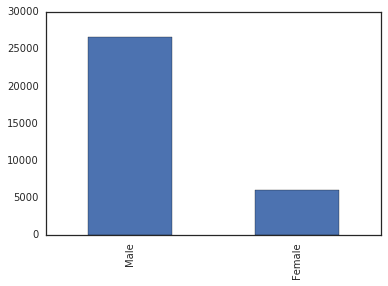

In [1170]:
X.Sex.value_counts().plot(kind='bar')

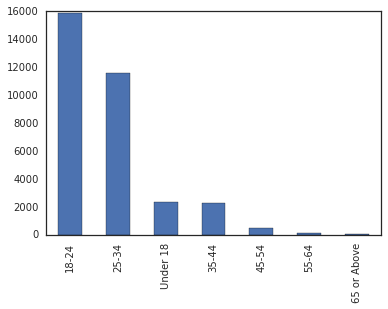

In [1171]:
X.Age_Category.value_counts().plot(kind='bar')

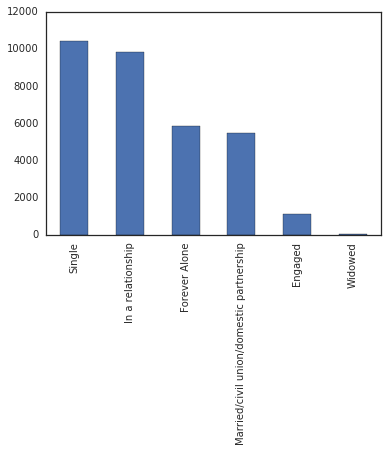

In [1172]:
X.Marital_Status.value_counts().plot(kind='bar')

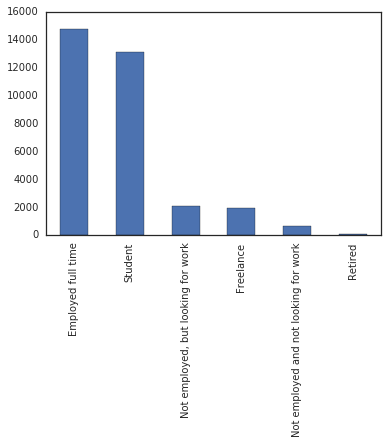

In [1173]:
X.Emp_Status.value_counts().plot(kind='bar')

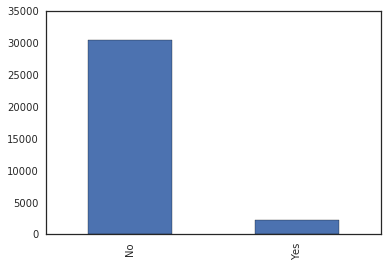

In [1174]:
X.Military.value_counts().plot(kind='bar')

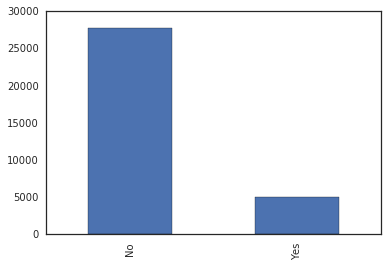

In [1175]:
X.Childrenlt18.value_counts().plot(kind='bar')

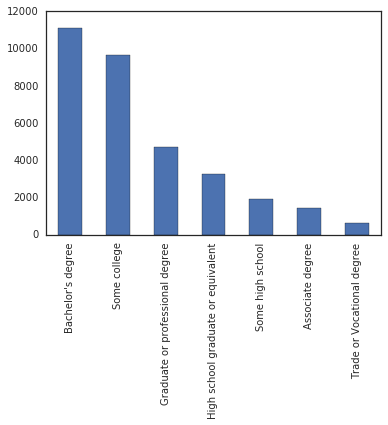

In [1176]:
X.Education_level.value_counts().plot(kind='bar')

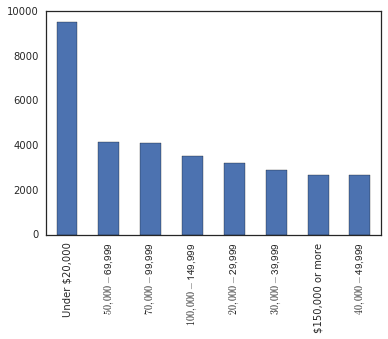

In [1177]:
X.Income_range.value_counts().plot(kind='bar')

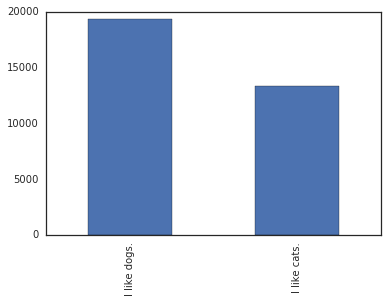

In [1178]:
X.DogorCat.value_counts().plot(kind='bar')

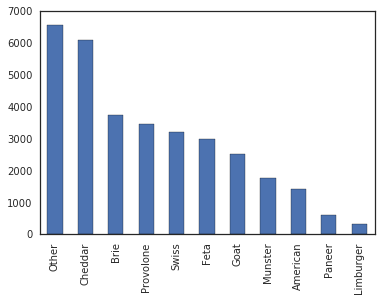

In [1179]:
X.Choice_Cheese.value_counts().plot(kind='bar')

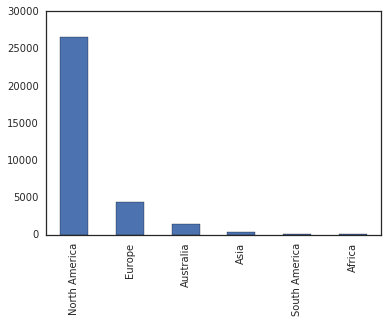

In [1180]:
X.Continent.value_counts().plot(kind='bar')

In [1181]:
y = X.pop('Military')
dummies = pd.get_dummies(y, prefix="Military")
y = pd.concat([y, dummies], axis=1)
y = y.drop("Military", axis=1)

In [1182]:
X.describe()

,Sex,Age_Category,Marital_Status,Emp_Status,Childrenlt18,Education_level,Income_range,DogorCat,Choice_Cheese,Continent
count,32754,32754,32754,32754,32754,32754,32754,32752,32754,32754
unique,2,7,6,6,2,7,8,2,11,6
top,Male,18-24,Single,Employed full time,No,Bachelor's degree,"Under $20,000",I like dogs.,Other,North America
freq,26619,15890,10433,14814,27707,11118,9507,19374,6567,26496


In [1183]:
y.describe()

,Military_No,Military_Yes
count,32754.000000,32754.000000
mean,0.932130,0.067870
std,0.251526,0.251526
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


## Pearson's Correlation Coefficient

In [1184]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1185]:
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [1186]:
X.describe()

,Sex,Age_Category,Marital_Status,Emp_Status,Childrenlt18,Education_level,Income_range,DogorCat,Choice_Cheese,Continent
count,32754,32754,32754,32754,32754,32754,32754,32752,32754,32754
unique,2,7,6,6,2,7,8,2,11,6
top,Male,18-24,Single,Employed full time,No,Bachelor's degree,"Under $20,000",I like dogs.,Other,North America
freq,26619,15890,10433,14814,27707,11118,9507,19374,6567,26496


## Implementing One hot encoding for all the categoricals

In [1187]:
categorical_variables = ['Sex', 'Age_Category', 'Marital_Status', 'Emp_Status','Childrenlt18',
                         'Education_level','Income_range','DogorCat','Choice_Cheese', 'Continent']
for variable in categorical_variables:
    dummies = pd.get_dummies(X[variable], prefix=variable)
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [1188]:
X

,Sex_Female,Sex_Male,Age_Category_18-24,Age_Category_25-34,Age_Category_35-44,Age_Category_45-54,Age_Category_55-64,Age_Category_65 or Above,Age_Category_Under 18,Marital_Status_Engaged,...,Choice_Cheese_Other,Choice_Cheese_Paneer,Choice_Cheese_Provolone,Choice_Cheese_Swiss,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Seaborn plot of graph

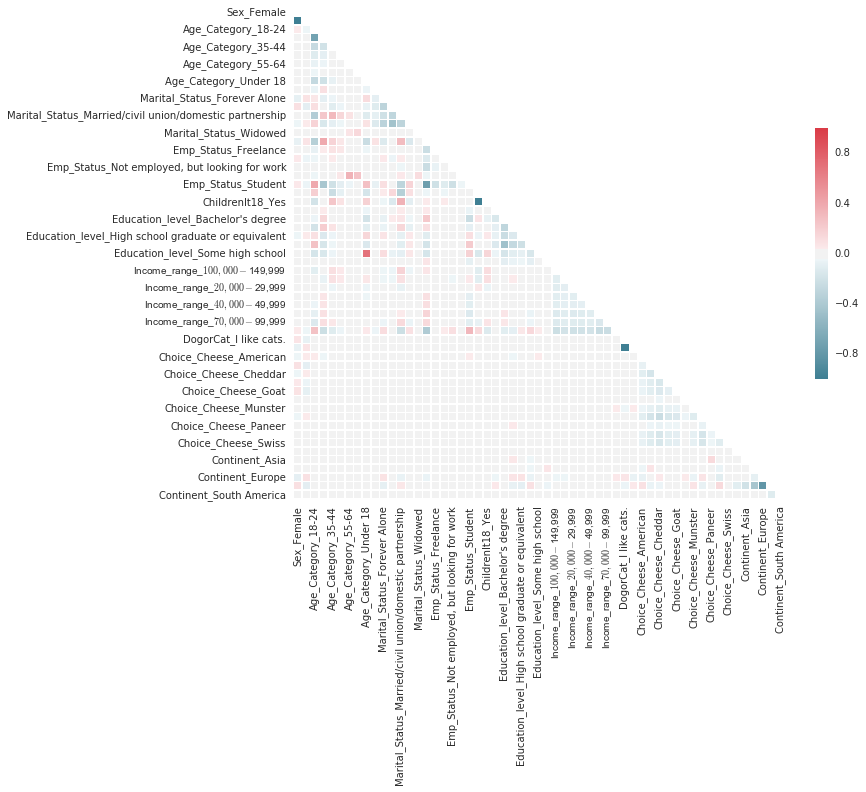

In [1189]:
sns.set(style="white")

#Computing the Corelation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [1190]:
y.head(n=1)

,Military_No,Military_Yes
0,1.0,0.0


## Random Forest Model

In [1191]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

## Executing the Random Forest Classifier

In [1201]:
model = RandomForestClassifier(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print "C-stat: ", roc_auc_score(y, model.predict(X))

C-stat:  0.783728445118


## Executing the Random Forest Regressor

In [1202]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
yhat = model.predict(X)
print "C-stat: ", roc_auc_score(y, yhat)

C-stat:  0.979789359761


In [1203]:
model.feature_importances_

array([ 0.00586314,  0.00456524,  0.01214344,  0.01591159,  0.01148214,
        0.00638135,  0.00356993,  0.00317831,  0.00551375,  0.01111358,
        0.0239936 ,  0.03344927,  0.01551471,  0.03408206,  0.00269295,
        0.02836216,  0.01748507,  0.00902336,  0.0148325 ,  0.00531457,
        0.02499276,  0.02309496,  0.02209766,  0.01461533,  0.03027522,
        0.02696593,  0.0229102 ,  0.03092713,  0.00846248,  0.01044998,
        0.02518399,  0.0200886 ,  0.02267843,  0.02143586,  0.02224386,
        0.02939386,  0.02620259,  0.03171707,  0.04153293,  0.04145873,
        0.01086418,  0.02259903,  0.02946561,  0.02031232,  0.01836471,
        0.00423658,  0.01430186,  0.03306625,  0.00391901,  0.02199135,
        0.02443927,  0.00033332,  0.00656695,  0.00818252,  0.00991188,
        0.00939592,  0.00084893])

C:\Users\Touseef\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


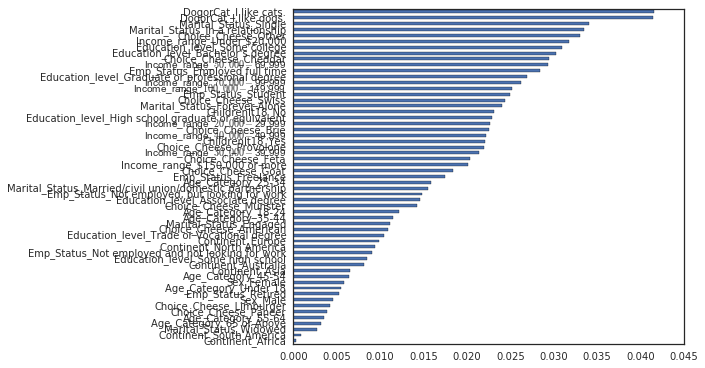

In [1204]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6));

C:\Users\Touseef\Anaconda2\lib\site-packages\ipykernel\__main__.py:25: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


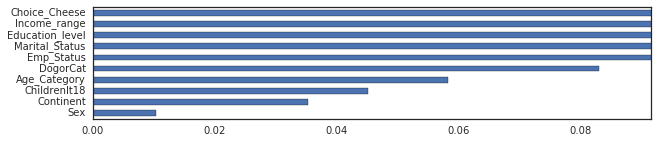

In [1205]:

def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
     
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, X.columns, summarized_columns=categorical_variables)